In [41]:
import numpy as np
import matplotlib.pyplot as plt
X_train = np.load("reshaped_14.npy")

In [42]:
hidden_nodes = 225
middle = 100
epochs = 1
lr = 1e-6
samples = 60000
input_size = 196
X = X_train.reshape(samples,input_size)
X = X/255.0
Lambda = 0.7
s = 0.1
# defining functions

def sigm(x):
    return 1/(1+np.exp(-x))

def diff_sigm(x):
    return (sigm(x)-(sigm(x)**2))

def layer(x,W,b):
    return np.matmul(x,W)+b

def backprop_last(output,label,out_penult):
    del1 = 2*(output-label)*diff_sigm(out_penult)
    return del1

def backprop_layer(prev_delta,out_prev):
    sn = -np.multiply(diff_sigm(out_prev),np.sum(prev_delta, axis=1).reshape(samples,1))
    return sn

W1 = np.random.normal(0,1,(input_size,middle))
Bi1 = np.random.normal(0,1,(1,middle))
W2 = np.random.normal(0,1,(middle,hidden_nodes))
Bi2 = np.random.normal(0,1,(1,hidden_nodes))
W3 = np.random.normal(0,1,(hidden_nodes,middle))
Bi3 = np.random.normal(0,1,(1,middle))
W4 = np.random.normal(0,1,(middle,input_size))
Bi4 = np.random.normal(0,1,(1,input_size))


In [43]:
epochs = 50
for i in range(epochs):
    loss = 0
    w1 = w2 = w3 = w4 = 0
    b1 = b2 = b3 = b4 = 0
    #forward pass
    out1 = layer(X,W1,Bi1)
    m1 = sigm(out1)
    out2 = layer(m1,W2,Bi2)
    z  = sigm(out2)
    out3 = layer(z,W3,Bi3)
    m2 = sigm(out3)
    out4 = layer(m2,W4,Bi4)
    y = sigm(out4)
    #BACKPROPAGATION
    del1 = backprop_last(y,X,out4)
    b4 = np.sum(del1, axis = 0).reshape(np.shape(Bi4))
    w4 = np.matmul(m2.T,del1)
    
    s3 = backprop_layer(del1,out3)
    w3 = np.matmul(z.T,s3)
    b3 = np.sum(s3,axis=0).reshape(np.shape(Bi3))
    #sparsity conditioning
    zm = np.mean(z,axis = 0)
    ge = (Lambda)*(-s/zm + (1-s)/(1-zm))*diff_sigm(out2)
    s2 = ge+backprop_layer(s3,out2)
    b2 = np.sum(s2,axis=0).reshape(np.shape(Bi2))
    w2 = np.matmul(m1.T,s2)
    
    s1 = backprop_layer(s2,out1)
    w1 = np.matmul(X.T,s1)
    b1 = np.sum(s1,axis=0).reshape(np.shape(Bi1))
    
    loss = np.sum(np.linalg.norm(y-X)**2)
    print(i,loss)
    W1 -= lr*w1
    W2 -= lr*w2
    W3 -= lr*w3
    W4 -= lr*w4
    Bi1 -= lr*b1
    Bi2 -= lr*b2
    Bi3 -= lr*b3
    Bi4 -= lr*b4
    

0 4231795.656239914
1 4151861.9011051194
2 4023483.7771919086
3 3843774.3940715417
4 3843572.6409001
5 3553186.497740605
6 3668418.3122388623
7 3533748.5453322707
8 3320889.8089594203
9 3133391.8849903094
10 2979322.2441122946
11 2844451.67348039
12 2720390.3101004115
13 2605519.315601246
14 2517759.155350193
15 2466611.596852338
16 2432736.522545599
17 2401514.3014266994
18 2366615.7006513667
19 2335104.39328813
20 2317360.4245106205
21 2306208.786400849
22 2294617.1310666846
23 2280588.690874615
24 2265834.963154288
25 2250440.453711168
26 2231462.1254039938
27 2217034.746657293
28 2210516.981142969
29 2206027.4387302613
30 2201871.735873268
31 2197760.0122636035
32 2193701.903337167
33 2189583.4977510637
34 2185028.078426257
35 2179393.0340454536
36 2171578.1380223786
37 2159483.1465329183
38 2139933.674214161
39 2114912.8530801167
40 2092333.3275528206
41 2072331.8177392706
42 2061555.699615583
43 2053533.9092270702
44 2042025.2419331097
45 2024987.6494296368
46 2012335.3973196123


In [47]:
out1 = layer(X,W1,Bi1)
m1 = sigm(out1)
out2 = layer(m1,W2,Bi2)
z  = sigm(out2)
out3 = layer(z,W3,Bi3)
m2 = sigm(out3)
out4 = layer(m2,W4,Bi4)
y = sigm(out4)

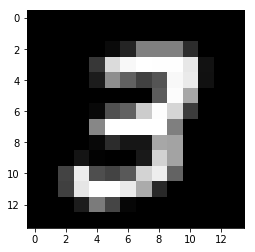

In [48]:
plt.imshow(X[7].reshape(14,14) , cmap='gray')

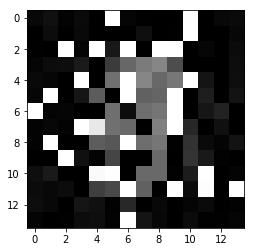

In [49]:
plt.imshow(y[7].reshape(14,14) , cmap='gray' )

In [50]:
count = 0
for i in range(len(z[1])):
    if(z[1][i] > 0.01):
        count += 1
print(count,len(z[1]))

print(np.mean(z[1]))


73 225
0.010010944662473013
